### Climate Change Impact Analysis

#### Climate Data Final Dataset

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score, mean_squared_error
from sklearn.preprocessing import MinMaxScaler, StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
import numpy as np


In [45]:
# Load dataset
file_path = "../Capstone-Project---Group-8/Data/Climate Change - datasets\climate_data_final_df.csv"
climate_merged_df = pd.read_csv(file_path,index_col=0)
climate_merged_df.head()

,Entity,Year,Carbon dioxide emissions from buildings,Carbon dioxide emissions from industry,Carbon dioxide emissions from land use change and forestry,Carbon dioxide emissions from other fuel combustion,Carbon dioxide emissions from transport,Carbon dioxide emissions from manufacturing and construction,Fugitive emissions of carbon dioxide from energy production,Carbon dioxide emissions from electricity and heat,...,Greenhouse gas emissions from electricity and heat,Fugitive emissions of greenhouse gases from energy production,Greenhouse gas emissions from other fuel combustion,Greenhouse gas emissions from bunker fuels,Annual CO₂ emissions (per capita),Average Temperature,mmfrom1993-2008average,Forest area (% of land area),"Population, total",Renewable energy consumption (% of total final energy consumption)
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
0,Afghanistan,1990,129999.99,50000.0,-2390000.0,0.0,970000.0,570000.0,280000.0,320000.0,...,320000.0,280000.0,0.0,20000.0,0.168054,12.222920,-22.847396,1.852782,12045660.0,23.0
1,Afghanistan,1991,140000.00,50000.0,-2390000.0,0.0,930000.0,530000.0,240000.0,300000.0,...,300000.0,240000.0,0.0,20000.0,0.156411,11.212434,-22.814062,1.852782,12238879.0,23.7
2,Afghanistan,1992,150000.00,50000.0,-2390000.0,0.0,740000.0,390000.0,200000.0,200000.0,...,200000.0,200000.0,0.0,20000.0,0.111609,10.987166,-20.247396,1.852782,13278974.0,27.4
3,Afghanistan,1993,160000.00,50000.0,-2390000.0,0.0,740000.0,380000.0,160000.0,200000.0,...,200000.0,160000.0,0.0,20000.0,0.099507,11.510678,-22.780729,1.852782,14943172.0,28.5
4,Afghanistan,1994,160000.00,50000.0,-2390000.0,0.0,730000.0,360000.0,120000.0,190000.0,...,190000.0,120000.0,0.0,20000.0,0.089462,11.846118,-17.980729,1.852782,16250794.0,30.1


In [46]:
# Checking the shape
climate_merged_df.shape

(6323, 28)

In [47]:
# Checking the datatypes
climate_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6323 entries, 0 to 6354
Data columns (total 28 columns):
 #   Column                                                              Non-Null Count  Dtype  
---  ------                                                              --------------  -----  
 0   Entity                                                              6323 non-null   object 
 1   Year                                                                6323 non-null   int64  
 2   Carbon dioxide emissions from buildings                             6323 non-null   float64
 3   Carbon dioxide emissions from industry                              6323 non-null   float64
 4   Carbon dioxide emissions from land use change and forestry          6323 non-null   float64
 5   Carbon dioxide emissions from other fuel combustion                 6323 non-null   float64
 6   Carbon dioxide emissions from transport                             6323 non-null   float64
 7   Carbon dioxide emiss

In [48]:
# checking the summary statistics
climate_merged_df.describe()

,Year,Carbon dioxide emissions from buildings,Carbon dioxide emissions from industry,Carbon dioxide emissions from land use change and forestry,Carbon dioxide emissions from other fuel combustion,Carbon dioxide emissions from transport,Carbon dioxide emissions from manufacturing and construction,Fugitive emissions of carbon dioxide from energy production,Carbon dioxide emissions from electricity and heat,Carbon dioxide emissions from bunker fuels,...,Greenhouse gas emissions from electricity and heat,Fugitive emissions of greenhouse gases from energy production,Greenhouse gas emissions from other fuel combustion,Greenhouse gas emissions from bunker fuels,Annual CO₂ emissions (per capita),Average Temperature,mmfrom1993-2008average,Forest area (% of land area),"Population, total",Renewable energy consumption (% of total final energy consumption)
count,6323.000000,6.323000e+03,6.323000e+03,6.323000e+03,6.323000e+03,6.323000e+03,6.323000e+03,6.323000e+03,6.323000e+03,6.323000e+03,...,6.323000e+03,6.323000e+03,6.323000e+03,6.323000e+03,6323.000000,5527.000000,6323.000000,6193.000000,6.323000e+03,6264.000000
mean,2005.529654,5.575472e+07,2.125237e+07,2.690093e+07,1.261191e+07,1.180319e+08,1.026921e+08,6.097247e+06,2.549890e+08,1.958448e+07,...,2.560967e+08,5.544787e+07,1.286635e+07,1.976765e+07,4.748857,19.029716,19.408416,33.460063,1.220099e+08,33.510529
std,9.219966,2.544587e+08,1.185633e+08,2.509279e+08,5.805679e+07,5.829772e+08,5.192009e+08,2.587100e+07,1.225914e+09,9.560421e+07,...,1.231280e+09,2.544258e+08,5.926866e+07,9.650206e+07,7.899655,8.089890,29.163940,24.244169,5.723961e+08,30.427138
min,1990.000000,0.000000e+00,0.000000e+00,-1.637860e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,-4.969122,-22.847396,0.000000,8.798000e+03,0.000000
25%,1998.000000,8.000000e+04,1.000000e+04,-7.650000e+05,0.000000e+00,6.200000e+05,1.600000e+05,0.000000e+00,2.200000e+05,7.000000e+04,...,2.200000e+05,0.000000e+00,0.000000e+00,7.000000e+04,0.600898,11.812214,-2.647396,12.160463,2.157018e+06,6.563883
50%,2006.000000,6.600000e+05,4.700000e+05,8.000000e+04,2.500000e+05,3.210000e+06,1.530000e+06,1.500000e+05,3.920000e+06,5.600000e+05,...,3.940000e+06,3.900000e+05,2.700000e+05,5.700000e+05,2.298188,22.619158,14.619271,32.107530,8.365878e+06,24.450000
75%,2014.000000,7.360000e+06,2.865000e+06,1.056000e+07,2.030000e+06,1.827000e+07,1.326500e+07,1.920000e+06,3.344500e+07,3.215000e+06,...,3.357500e+07,9.020000e+06,2.070000e+06,3.250000e+06,6.635468,25.580124,50.461706,51.646391,2.881387e+07,57.525000
max,2021.000000,2.822010e+09,1.696360e+09,2.405250e+09,7.519400e+08,8.279320e+09,6.427310e+09,3.227600e+08,1.622524e+10,1.325790e+09,...,1.630219e+10,3.336260e+09,7.686300e+08,1.338160e+09,364.688320,29.794220,66.704325,96.226381,7.921184e+09,98.300000


In [49]:
# Checking for duplicates
print("Number of duplicates:",climate_merged_df.duplicated().sum())

Number of duplicates: 0


In [50]:
# Check for missing values
missing_values = climate_merged_df.isnull().sum().sort_values(ascending=False)
# missing values as percentage
missing_values_percent = (missing_values/len(climate_merged_df)*100)

missing_summary = pd.DataFrame({"missing values": missing_values,
             "missing values percent":missing_values_percent
             })
missing_summary

,missing values,missing values percent
Average Temperature,796,12.588961
Forest area (% of land area),130,2.055986
Renewable energy consumption (% of total final energy consumption),59,0.933101
Year,0,0.000000
"Population, total",0,0.000000
mmfrom1993-2008average,0,0.000000
Annual CO₂ emissions (per capita),0,0.000000
Greenhouse gas emissions from bunker fuels,0,0.000000
Greenhouse gas emissions from other fuel combustion,0,0.000000
Fugitive emissions of greenhouse gases from energy production,0,0.000000


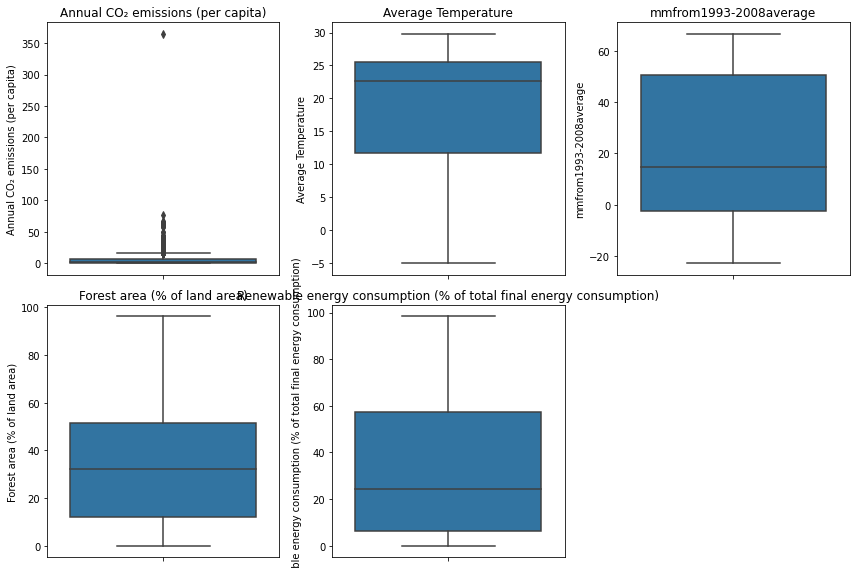

In [51]:
# Checking for outliers
columns_to_plt = ["Annual CO₂ emissions (per capita)", "Average Temperature", "mmfrom1993-2008average",
                   "Forest area (% of land area)", "Renewable energy consumption (% of total final energy consumption)"]

plt.figure(figsize=(12,8))
for i, col in enumerate(columns_to_plt, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=climate_merged_df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

##### Handle missing values

- using median to fill average temperatures because temperature distributions often have outliers, especially for regions with extreme climates.Median is not significantly affected by outliers.
- Using the mean per country to fill forest area of land and Reneweable energy ensures we fill missing values based on similar data points rather than a global statistic and these values are highly dependent on the country or region.

In [52]:
# Filling missing temperatures with median
climate_merged_df.fillna({"Average Temperature": climate_merged_df["Average Temperature"].median()}, inplace=True)

# Filling missing forest area with group means
climate_merged_df["Forest area (% of land area)"] = climate_merged_df["Forest area (% of land area)"].fillna(climate_merged_df.groupby("Entity")["Forest area (% of land area)"].transform("mean"))

# Filling missing renewable energy with group means
climate_merged_df["Renewable energy consumption (% of total final energy consumption)"] = climate_merged_df["Renewable energy consumption (% of total final energy consumption)"].fillna(
    climate_merged_df.groupby("Entity")["Renewable energy consumption (% of total final energy consumption)"].transform("mean")
)

# Verify that missing values are handled
climate_merged_df.isnull().sum().sum()

0

In [53]:
climate_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6323 entries, 0 to 6354
Data columns (total 28 columns):
 #   Column                                                              Non-Null Count  Dtype  
---  ------                                                              --------------  -----  
 0   Entity                                                              6323 non-null   object 
 1   Year                                                                6323 non-null   int64  
 2   Carbon dioxide emissions from buildings                             6323 non-null   float64
 3   Carbon dioxide emissions from industry                              6323 non-null   float64
 4   Carbon dioxide emissions from land use change and forestry          6323 non-null   float64
 5   Carbon dioxide emissions from other fuel combustion                 6323 non-null   float64
 6   Carbon dioxide emissions from transport                             6323 non-null   float64
 7   Carbon dioxide emiss

#### Climate Risk Index Dataset

In [54]:
# Load dataset
file_path = "../Capstone-Project---Group-8/Data/Climate Change - datasets/Climate Risk Index.csv"
index_df = pd.read_csv(file_path)
index_df.head()

,index,cartodb_id,the_geom,the_geom_webmercator,country,cri_rank,cri_score,fatalities_per_100k_rank,fatalities_per_100k_total,fatalities_rank,fatalities_total,losses_per_gdp__rank,losses_per_gdp__total,losses_usdm_ppp_rank,losses_usdm_ppp_total,rw_country_code,rw_country_name
0,0,1,NaN,NaN,Saudi Arabia,79,72.50,18,0.45,18,140,131,0.0001,119,1.229,SAU,Saudi Arabia
1,1,2,NaN,NaN,Romania,61,61.50,112,0.01,102,1,16,0.6746,11,2797.884,ROU,Romania
2,2,3,NaN,NaN,Spain,69,66.33,74,0.05,47,22,86,0.0394,31,637.070,ESP,Spain
3,3,4,NaN,NaN,Slovenia,135,124.50,114,0.00,114,0,135,NaN,135,0.000,SVN,Slovenia
4,4,5,NaN,NaN,South Sudan,133,117.33,114,0.00,114,0,120,0.0021,122,0.508,SSD,South Sudan


In [55]:
# Chaeck the shape of the dataset
index_df.shape

(182, 17)

In [56]:
# Calculate summary statistics
index_df.describe()

,index,cartodb_id,the_geom,the_geom_webmercator,cri_rank,cri_score,fatalities_per_100k_rank,fatalities_per_100k_total,fatalities_rank,fatalities_total,losses_per_gdp__rank,losses_per_gdp__total,losses_usdm_ppp_rank,losses_usdm_ppp_total
count,182.000000,182.000000,0.0,0.0,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,131.000000,182.000000,182.000000
mean,90.500000,91.500000,NaN,NaN,85.230769,81.791923,78.609890,0.519670,77.626374,86.840659,85.302198,1.517654,85.302198,907.507599
std,52.683014,52.683014,NaN,NaN,44.708529,34.582412,37.858511,3.393934,37.500688,427.350623,44.691600,8.171267,44.691600,4483.998505
min,0.000000,1.000000,NaN,NaN,1.000000,12.170000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000100,1.000000,0.000000
25%,45.250000,46.250000,NaN,NaN,46.250000,52.872500,46.250000,0.000000,46.250000,0.000000,46.250000,0.016500,46.250000,0.000000
50%,90.500000,91.500000,NaN,NaN,91.000000,77.500000,91.500000,0.020000,90.000000,2.000000,91.500000,0.084100,91.500000,30.347000
75%,135.750000,136.750000,NaN,NaN,135.000000,124.500000,114.000000,0.120000,114.000000,22.750000,135.000000,0.275950,135.000000,262.178250
max,181.000000,182.000000,NaN,NaN,135.000000,124.500000,114.000000,43.660000,114.000000,4317.000000,135.000000,77.369400,135.000000,40077.222000


In [57]:
index_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182 entries, 0 to 181
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   index                      182 non-null    int64  
 1   cartodb_id                 182 non-null    int64  
 2   the_geom                   0 non-null      float64
 3   the_geom_webmercator       0 non-null      float64
 4   country                    182 non-null    object 
 5   cri_rank                   182 non-null    int64  
 6   cri_score                  182 non-null    float64
 7   fatalities_per_100k_rank   182 non-null    int64  
 8   fatalities_per_100k_total  182 non-null    float64
 9   fatalities_rank            182 non-null    int64  
 10  fatalities_total           182 non-null    int64  
 11  losses_per_gdp__rank       182 non-null    int64  
 12  losses_per_gdp__total      131 non-null    float64
 13  losses_usdm_ppp_rank       182 non-null    int64  

1) cri_rank & cri_score
- CRI score and rank measure how severely a country is affected by climate-related events.
A higher CRI rank indicates greater vulnerability to the negative impacts of climate-related disasters.

2) fatalities_per_100k_total & fatalities_rank
 - Show how deadly climate disasters are per 100,000 people.
Higher fatalities suggest regions with poor climate resilience.

3) losses_per_gdp_total & losses_per_gdp_rank
-Shows economic losses as a percentage of GDP, helping measure financial vulnerability.
If losses are high, climate events have a major economic impact in that country.

4) losses_usdm_ppp_total & losses_usdm_ppp_rank
- Shows total climate-induced economic losses in million USD.
Helps to compare how much money different countries lose due to climate-related disasters.

#### Data Cleaning

In [58]:
# Drop the null columns
index_df = index_df.drop(['the_geom','the_geom_webmercator'],axis=1)
# Handle missing values
index_df['losses_per_gdp__total'].fillna(index_df['losses_per_gdp__total'].median(),inplace=True)
# Drop rows with missing rw_country_code
index_df.dropna(subset=['rw_country_code'],inplace=True)
print("Cleaned dataset overview:")
print(index_df.isnull().sum())

Cleaned dataset overview:
index                        0
cartodb_id                   0
country                      0
cri_rank                     0
cri_score                    0
fatalities_per_100k_rank     0
fatalities_per_100k_total    0
fatalities_rank              0
fatalities_total             0
losses_per_gdp__rank         0
losses_per_gdp__total        0
losses_usdm_ppp_rank         0
losses_usdm_ppp_total        0
rw_country_code              0
rw_country_name              0
dtype: int64


- The dataset has no missing values

#### Checking for Duplicates

In [59]:
print('Number of duplicates:',index_df.duplicated().sum())

Number of duplicates: 0


**Modelling**

**Climate Change and Temperature Prediction**


*   Here we use the climate_merged dataset
*   Features of focus will be renewable energy consumption, carbon dioxide emissions from land use change and forestry, forest area, annual co2 emissions per capita, population, mmfrom1993-2008average, year



**Feature selection - Correlation-Based Selection**

Average Temperature                                                   1.000000
Renewable energy consumption (% of total final energy consumption)    0.285381
Carbon dioxide emissions from land use change and forestry            0.100320
Greenhouse gas emissions from land use change and forestry            0.096984
Forest area (% of land area)                                          0.082675
Year                                                                  0.036734
mmfrom1993-2008average                                                0.035968
Greenhouse gas emissions from agriculture                            -0.003220
Population, total                                                    -0.015669
Carbon dioxide emissions from bunker fuels                           -0.016410
Greenhouse gas emissions from bunker fuels                           -0.016410
Greenhouse gas emissions from waste                                  -0.016701
Carbon dioxide emissions from industry              

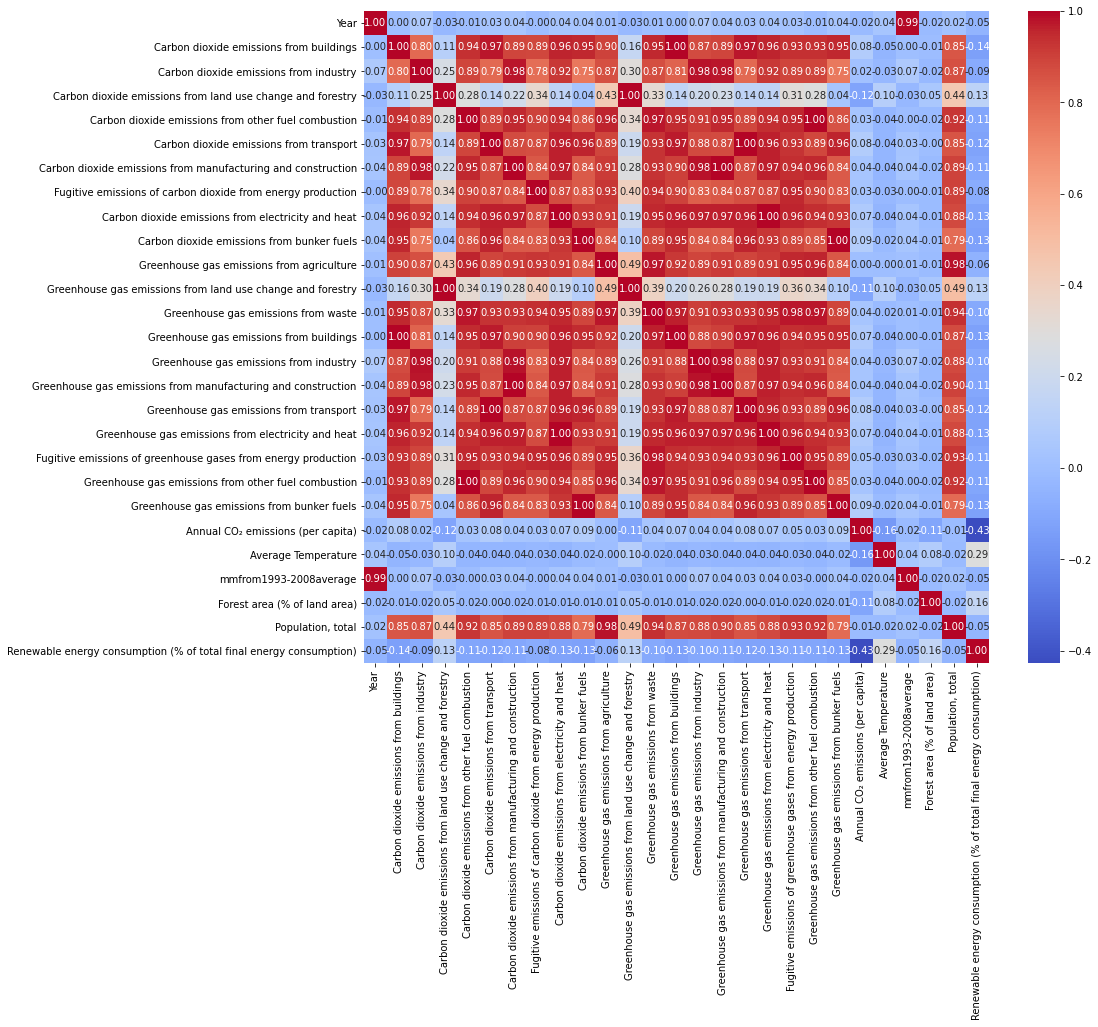

In [60]:
# Selecting numerical features only
numerical_features = climate_merged_df.select_dtypes(include=['number'])
corr_matrix = numerical_features.corr()
target_corr = corr_matrix['Average Temperature'].sort_values(ascending=False)

# Display top correlated features
print(target_corr)
# plot heatmap
plt.figure(figsize=(14,12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

In [61]:
climate_merged_df.columns

Index(['Entity', 'Year', 'Carbon dioxide emissions from buildings',
       'Carbon dioxide emissions from industry',
       'Carbon dioxide emissions from land use change and forestry',
       'Carbon dioxide emissions from other fuel combustion',
       'Carbon dioxide emissions from transport',
       'Carbon dioxide emissions from manufacturing and construction',
       'Fugitive emissions of carbon dioxide from energy production',
       'Carbon dioxide emissions from electricity and heat',
       'Carbon dioxide emissions from bunker fuels',
       'Greenhouse gas emissions from agriculture',
       'Greenhouse gas emissions from land use change and forestry',
       'Greenhouse gas emissions from waste',
       'Greenhouse gas emissions from buildings',
       'Greenhouse gas emissions from industry',
       'Greenhouse gas emissions from manufacturing and construction',
       'Greenhouse gas emissions from transport',
       'Greenhouse gas emissions from electricity and heat',

In [62]:
# creating a new dataframe for modelling
features = ["Renewable energy consumption (% of total final energy consumption)",
            "Carbon dioxide emissions from land use change and forestry",
            "Forest area (% of land area)","Annual CO₂ emissions (per capita)",
            "Population, total", "mmfrom1993-2008average","Year"]
# create the dataframe
df_model = climate_merged_df[features + ["Average Temperature"]].dropna()

# Display dataset summary
df_model.info()
df_model.head()

<class 'pandas.core.frame.DataFrame'>
Index: 6323 entries, 0 to 6354
Data columns (total 8 columns):
 #   Column                                                              Non-Null Count  Dtype  
---  ------                                                              --------------  -----  
 0   Renewable energy consumption (% of total final energy consumption)  6323 non-null   float64
 1   Carbon dioxide emissions from land use change and forestry          6323 non-null   float64
 2   Forest area (% of land area)                                        6323 non-null   float64
 3   Annual CO₂ emissions (per capita)                                   6323 non-null   float64
 4   Population, total                                                   6323 non-null   float64
 5   mmfrom1993-2008average                                              6323 non-null   float64
 6   Year                                                                6323 non-null   int64  
 7   Average Temperature  

,Renewable energy consumption (% of total final energy consumption),Carbon dioxide emissions from land use change and forestry,Forest area (% of land area),Annual CO₂ emissions (per capita),"Population, total",mmfrom1993-2008average,Year,Average Temperature
Unnamed: 0,,,,,,,,
0,23.0,-2390000.0,1.852782,0.168054,12045660.0,-22.847396,1990,12.222920
1,23.7,-2390000.0,1.852782,0.156411,12238879.0,-22.814062,1991,11.212434
2,27.4,-2390000.0,1.852782,0.111609,13278974.0,-20.247396,1992,10.987166
3,28.5,-2390000.0,1.852782,0.099507,14943172.0,-22.780729,1993,11.510678
4,30.1,-2390000.0,1.852782,0.089462,16250794.0,-17.980729,1994,11.846118


**Linear Regression Model**

In [63]:
# Define features and target variables
X = df_model.drop(columns=['Average Temperature'])
y= df_model['Average Temperature']


In [64]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state =42)
# Train a linear reg model
model = LinearRegression()
model.fit(X_train,y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

mae, mse, r2

(5.943476243364017, 53.085457933740344, 0.07715284045353754)

* From linear regression baseline model, the MAE is 5.94 °C, meaning on
average, predictions are 5.94 degrees off.

* R2 score 0.077, the model explains only 7.7% of the variance in temp meaning its not very predictives.

**Random Forest Model**

In [65]:
from sklearn.ensemble import RandomForestRegressor


In [66]:
rf_model = RandomForestRegressor(n_estimators=100, random_state = 42)
rf_model.fit(X_train,y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate  model performance
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test,y_pred_rf)
r2_rf = r2_score(y_test,y_pred_rf)

mae_rf, mse_rf, r2_rf

(0.5420182935574482, 1.0942449899645674, 0.9809774480593692)

* Mean Absolute Error(MAE): 0.59°C, predictions are on average 0.59 degrees off.
* MSE is 1.33
* R-squared score: 0.98 - model explains 98% of the variance, meaning it performs extremely well

Feature Importance Using Random Forest

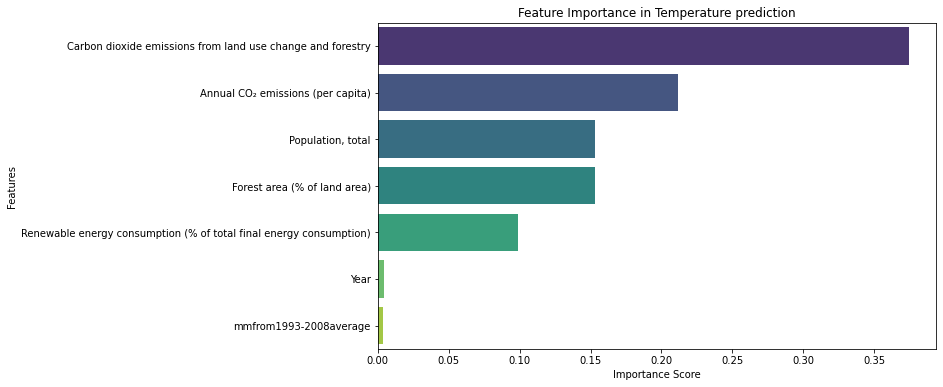

Carbon dioxide emissions from land use change and forestry            0.374692
Annual CO₂ emissions (per capita)                                     0.211967
Population, total                                                     0.153199
Forest area (% of land area)                                          0.153164
Renewable energy consumption (% of total final energy consumption)    0.098685
Year                                                                  0.004610
mmfrom1993-2008average                                                0.003682
dtype: float64

In [67]:
# Get feature importances from the Random Forest model
feature_importances = pd.Series(rf_model.feature_importances_,
                                index=X.columns).sort_values(ascending = False)
# Plot feature importances
plt.figure(figsize=(10,6))
sns.barplot(x=feature_importances,y=feature_importances.index,palette='viridis')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title ('Feature Importance in Temperature prediction')
plt.show()

# Display numerical values
feature_importances

Renewable Energy Adoption Prediction

In [71]:
# Step 1: Define the target and features
target = 'Renewable energy consumption (% of total final energy consumption)'
exclude_columns = ['Entity', 'Year', target]
X = climate_merged_df.drop(columns=exclude_columns)
y = climate_merged_df[target]

# Step 3: Drop highly correlated features
corr_matrix = X.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]
X_reduced = X.drop(columns=to_drop)

# Step 4: Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

# Step 5: Train model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Step 6: Evaluate
y_pred = model.predict(X_test)
print("R2:", r2_score(y_test, y_pred))
print("MAE", mean_absolute_error(y_test,y_pred))


R2: 0.9889073005308346
MAE 1.677830257795301


- There is slight change in the model prediction, still high performances

Feature importance selection

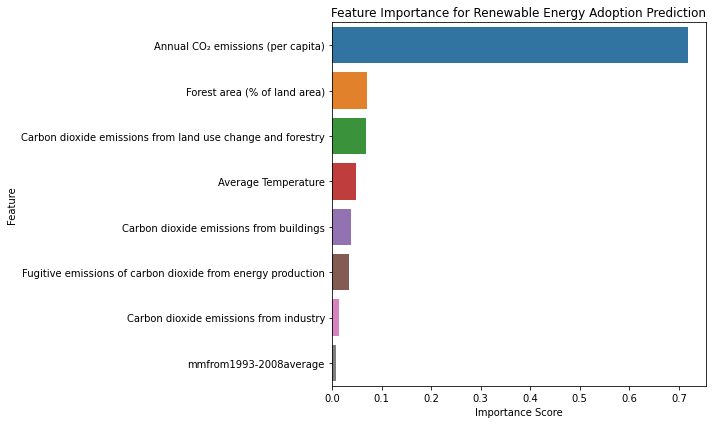

                                             Feature  Importance
4                  Annual CO₂ emissions (per capita)    0.717923
7                       Forest area (% of land area)    0.071061
2  Carbon dioxide emissions from land use change ...    0.067957
5                                Average Temperature    0.047926
0            Carbon dioxide emissions from buildings    0.037776
3  Fugitive emissions of carbon dioxide from ener...    0.035114
1             Carbon dioxide emissions from industry    0.013640
6                             mmfrom1993-2008average    0.008603


In [ ]:
# Step 6: Feature importance
importances = model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X_reduced.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance_df, x='Importance', y='Feature')
plt.title('Feature Importance for Renewable Energy Adoption Prediction')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

print(feature_importance_df)

- CO₂ per capita is by far the strongest predictor — suggesting countries with higher per-person emissions may have stronger motivation or capacity to adopt renewables.
- Forest cover and population also contribute significantly — likely linked to sustainability policies and energy demand.
- Temperature & land use emissions play moderate roles, possibly signaling environmental or policy drivers.